#### Task 1.1: Data Understanding

Explore the incidents dataset using analytical tools and write a concise "data understanding" report that assesses data quality, the distribution of variables, and pairwise correlations.

Subtasks of Data Understanding:

- Data semantics for each feature not described above and the new ones defined by the team
- Distribution of the variables and statistics
- Assessing data quality (missing values, outliers, duplicated records, errors)
- Variables transformations
- Pairwise correlations and eventual elimination of redundant variables

Nice visualization and insights can be obtained by exploiting the latitude and longitude features ([example](https://plotly.com/python/getting-started/)).

For this task we followed the following check structure [#WIP]():
1. [] Type of data
2. [x] Type of attribute
3. [] Data Quality
4. [ ] Outliers detection and manipulation
5. [ ] Correlation analysis


#### Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for describing the incidents. Some examples of indicators to be computed are:

- How many males are involved in incidents relative to the total number of males for the same city and in the same period?
- How many injured and killed people have been involved relative to the total injured and killed people in the same congressional district in a given period of time?
- Ratio of the number of killed people in the incidents relative to the number of participants in the incident
- Ratio of unharmed people in the incidents relative to the average of unharmed people in the same period

Note that these examples are not mandatory, and teams can define their own indicators. Each indicator must be correlated with a description and, when necessary, its mathematical formulation. The extracted variables will be useful for the clustering analysis in the second project's task. Once the set of indicators is computed, the team should explore the new features for a statistical analysis, including distributions, outliers, visualizations, and correlations.

See the corresponding Notebook in [Task 1.2 - Data Preparation](Task1_Data_Preparation.ipynb).




# Task 1.1 - Data Understanding `incident.csv`

We have to do some data understanding, so we're gonna explore the dataset. We can start with a simple analysis that establish the variable inside our dataset and visualize a bunch of their distibution, type, etc...

In [1]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Dataset Structure

Let's breakdown the first, larger dataset `incidents.csv` by describing briefly the general structure:
- 28 Columns features: Some categorical like `date`, `state` etc... Others are numerical like `n_participants, n_males` despite the type must be still checked. 
- Textual features like `notes`, `incident_characteristics1` and `incident_characteristics2` will be firstly analyzed but, at first look, are not much useful when combined with other dataset as the information reported are fragmented/incorrect/ambiguous. 

Let's import all the three dataset, starting to analyze first the larger one:

In [2]:
# Import the datasets

# Gun incidents data
df_incidents = pd.read_csv('../source/ds/incidents.csv')

# Poverty by state and year
df_poverty = pd.read_csv('../source/ds/povertyByStateYear.csv')

# Year-state-district-house
df_ysdh = pd.read_csv('../source/ds/year_state_district_house.csv')


# Visualize data table
df_incidents.head(20)


/tmp/ipykernel_473912/2572660480.py:4: DtypeWarning:

Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
5,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,4.0,7.0,65.0,...,1.0,0.0,0,1,0.0,0.0,1.0,NaN,Shot - Wounded/Injured,Home Invasion
6,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,63.0,15.0,30.0,...,5.0,0.0,2,1,2.0,0.0,5.0,Good Samaritan shot aggressors - was arrested ...,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
7,2016-03-16,Connecticut,New Haven,560 Ella T Grasso Boulevard,41.2945,-72.9457,3.0,116.0,10.0,NaN,...,1.0,0.0,0,0,1.0,0.0,1.0,"student hid Ruger 357 gun in coat, no shots fired",Institution/Group/Business,Non-Shooting Incident
8,2016-08-01,Virginia,Stafford,Cool Springs Road and North Kings Highway,38.3008,-77.4469,1.0,28.0,28.0,65.0,...,1.0,0.0,1,0,0.0,0.0,1.0,"car crash, suspect holding handgun, officers s...","Shot - Dead (murder, accidental, suicide)",Officer Involved Incident
9,2015-03-22,Oklahoma,Tulsa,12500 block of East 52nd Street,36.1060,-96.0764,1.0,66.0,37.0,20.0,...,0.0,1.0,0,1,0.0,0.0,1.0,Super 8 Motel,Shot - Wounded/Injured,Accidental Shooting


At first look there are values whose the type is not matching or is ambiguous, so we delve deeper into this aspect:

In [3]:
print("--"*50)
df_incidents.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null

## 1. Data Quality [#WIP]()
In this section we evaluate the following:
- **Syntactic accuracy**: if the domain value of the attributes is respected
- **Semantic accuracy**: correct attribute value
- **Completeness**: if the samples cover the all the possible value of the attribute
- **Unbalanced data**: understand if all the record represents all the possible scenarios the dataset want describe, equally
- **Timeliness**: understand if data are coherent respect to the timeframe considered

It's necessary to highlight also the importance of __eliminate duplicate data, plot the histogram visualization for frequency distribution and measure the central tendency (_AAD,MAD_)__. 


In [4]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


The `describe` return basic statistics for numerical attributes: at first look, are missing multiple attributes because some of the expected numerical attributes are of type `object`. Also, most of the attributes shown are `float64` despite the expected numerical range is an `int64`. 

Aside from that, still without much pre-processing we can understand that:
- `congressional_district`: the min and max value return a correct domain for the attribute as the state with most congressional district is the state of California.
- `state_house_district`: the min and max value shows an _incorrect_ domain as the state with most state house district is the New Hampshire with 400 district, not 901.
- `state_senate_district`: the min and max value shows an _incorrect_ domain as the state with most state senate district is the Minnesota with 67 district, not 94.
- `partecipant_age1`:  the max age shows the presence of noise data with age over 300.


## Preliminary data conversions

All of the following attributes are `object` or `float64` so we convert them to `int64`:

In [5]:
# - avg_age_participants, min_age_participants, max_age_participants, n_participant_child, n_participant_teen, n_participant_adult: are all object time, convert them to int
columns_to_convert = [
    'min_age_participants',
    'avg_age_participants',
    'max_age_participants',
    'n_participants_child',
    'n_participants_teen',
    'n_participants_adult'
]

district_to_int = ['state_house_district', 'state_senate_district', 'congressional_district']

# Convert non-numeric values to NaN
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].apply(pd.to_numeric, errors='coerce')

for column in district_to_int:
    df_incidents[column] = df_incidents[column].fillna(0).astype(int)
    
# Fill NaN values with 0
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].fillna(0).astype(int)


df_incidents.dtypes
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,239677.000000,239677.000000,239677.000000,147379.000000,2.396770e+05,2.396770e+05,2.396770e+05,239677.000000,239677.000000,239677.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,7.602532,46.477576,17.714528,30.295707,3.767312e+06,1.624494e+04,1.242133e+04,13.289519,6.975338,15.263233,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.448175,43.576547,14.949467,13.363592,1.838355e+09,1.792441e+06,8.774425e+04,2991.328168,2019.152261,2935.067922,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,-1.000000e+03,-1.000000e+03,-1.000000e+03,-977.000000,-947.000000,-991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,9.000000,5.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,35.000000,15.000000,27.000000,1.900000e+01,2.100000e+01,2.100000e+01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,77.000000,29.000000,37.000000,2.900000e+01,3.100000e+01,3.300000e+01,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.000000,311.000000,9.000000e+11,8.719163e+08,8.300000e+06,886365.000000,762487.000000,827900.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


## Type and Range data considerations
The type conversion shows all the expected numerical column, highlighting that:
- `min_age_partecipants`: shows noise data with age -1000 and max age over 8 billion. Similar behaviour is inevitably also found for attributes `avg_age_partecipants, max_age_partecipants`
- `n_partecipants_child`,`n_partecipants_teen` and `n_participants_adult`: min value cannot be negative and max value is over the (_un-processed_) dataset size of 239677 records.
- Also we can observe that a lot of data are in float format, so we convert them to int64.

Other consistency checks are performed after the dataset has been manipulated from noise and outlier records.

Let's understand what is the semantic of the text attributes and their frequencies:

In [6]:
# Top notes text motivations
df_incidents['notes'].value_counts().head(20)

notes
man shot                            501
1 inj.                              485
1 killed.                           468
Male shot wounded                   396
shot in leg                         349
1mv                                 332
1mvk                                266
shot multiple times                 256
Male shot killed                    251
ar                                  210
9mm                                 187
380 caliber                         172
1 male shot - wounded               172
Car-jacking.                        160
1 inj                               152
1 inj. This story is developing.    151
1 male victim shot - killed         139
1 killed                            132
shots fired                         128
shot and wounded                    117
Name: count, dtype: int64

In [7]:
#Top incident_characteristics1 text motivations
df_incidents['incident_characteristics1'].value_counts().head(20)

incident_characteristics1
Shot - Wounded/Injured                                          93926
Shot - Dead (murder, accidental, suicide)                       45054
Non-Shooting Incident                                           41541
Shots Fired - No Injuries                                       33949
Armed robbery with injury/death and/or evidence of DGU found     7528
Institution/Group/Business                                       4316
TSA Action                                                       2653
Brandishing/flourishing/open carry/lost/found                    1350
Home Invasion                                                    1323
Possession (gun(s) found during commission of other crimes)      1310
Drug involvement                                                 1005
Shots fired, no action (reported, no evidence found)              961
Gun(s) stolen from owner                                          834
Officer Involved Incident                                       

In [8]:
#Top incident_characteristics2 text motivations
df_incidents['incident_characteristics2'].value_counts().head(20)

incident_characteristics2
Officer Involved Incident                                       13881
Drive-by (car to street, car to car)                            11873
Drug involvement                                                11717
Home Invasion                                                    8664
Shot - Dead (murder, accidental, suicide)                        8345
Armed robbery with injury/death and/or evidence of DGU found     6438
Possession (gun(s) found during commission of other crimes)      6084
ATF/LE Confiscation/Raid/Arrest                                  5916
Accidental Shooting                                              5723
Domestic Violence                                                5690
Institution/Group/Business                                       5315
Suicide^                                                         4680
Brandishing/flourishing/open carry/lost/found                    4181
Gang involvement                                                

The `notes` attribute contains arbitrary values, difficult to extract and categorize, alongside the number of non-NA records for this attribute is very low so it result not useful for the goal of the analysis. 

The attribute `incident_characteristics1` describe the specificity of the incidents, sometimes relative to the type of shot (_dead, injured, wounded, accidental, suicide, etc_) while the attribute `incident_characteristics2` describe the specificity of the context in which the incident happened or has been recorded. 

In [9]:
valid_text_mask = (df_incidents['incident_characteristics1'].notna() & df_incidents['incident_characteristics2'].notna())
# Count the number of records that have both attributes not null
valid_text_mask.sum()

141931

## Dropping unnecessary columns

In [10]:
# Maybe drop state and senate district: state_house_district', 'state_senate_district', 'congressional_district'.
df_incidents.drop(['address'], axis=1, inplace=True) 

df_incidents.head()

,date,state,city_or_county,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7,94,33,19.0,Adult 18+,...,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5,0,0,62.0,Adult 18+,...,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14,4,2,NaN,NaN,...,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1,0,0,NaN,Adult 18+,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,40.4621,-80.0308,14,0,0,NaN,Adult 18+,...,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


Another text attribute is `participant_age_group1`:

In [11]:
df_incidents['participant_age_group1'].value_counts().head()

participant_age_group1
Adult 18+     181324
Teen 12-17     13659
Child 0-11      2575
Name: count, dtype: int64

This attribute can be useful to reconstruct the missing values of `n_participants_child`, `n_participants_teen` and `n_participants_adult` so we decide to not drop it. 

Let's also consider the `date` attribute, defining the range of years that the dataset refer:

In [12]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])

df_incidents['year'] = df_incidents['date'].dt.year

sorted(df_incidents['year'].value_counts().nlargest(20).index)

[2013, 2014, 2015, 2016, 2017, 2018, 2028, 2029, 2030]

We assumed that the `date` referring 2028,2029,2030 are errors so the year's range is defined over $[2013,2019]$.

In [13]:
# Exploring dataset errors, there are various type such as: cities located in wrong states, logitude and latiude 
# wrong years in incident dataframe (incidents in 2029 and 2030, maybe they were 2019-2020 since data is until 2020)

# Changing dates in df_incidents

df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2028', '2018')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2029', '2019')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2030', '2020')

df_incidents['date'].str.split('-').str[0].unique()

array(['2015', '2017', '2016', '2020', '2014', '2018', '2019', '2013'],
      dtype=object)

## Incident per year

OI
For each year, we have a number of records of incidents, i'd say to drop maybe the year 2013 later because it has very few, I suggest to drop 2018-2020 because they gathered the first three month

date
2017    61401
2016    58763
2015    44750
2014    37677
2019    14107
2018    13997
2020     8729
2013      253
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of incidents per year')

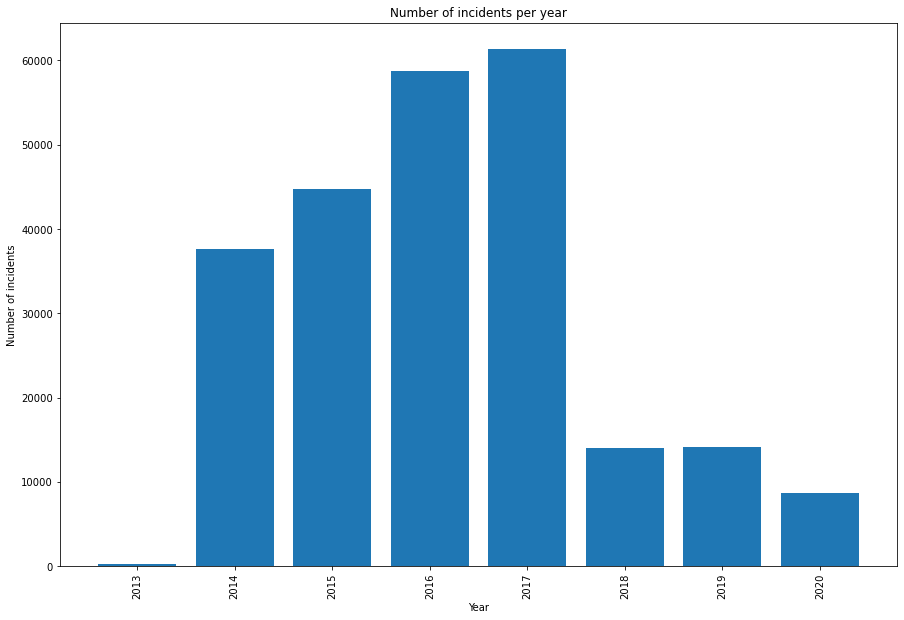

In [14]:
year_counts = df_incidents['date'].str.split('-').str[0].value_counts()
print(year_counts)

# order by year
year_counts = year_counts.sort_index()

# histogram of the number of incidents per year
plt.figure(figsize=(15, 10))
plt.bar(year_counts.index, year_counts.values)
plt.xticks(rotation=90) 
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.title('Number of incidents per year')

## Partitipants per state visualization

\#todo maybe move this in data preparation

The following plot visualizes the distribution of total participants in incidents across different states. This provide insights into the geographic distribution of incidents and help identify states with higher or lower levels of participation, used later in the analysis.


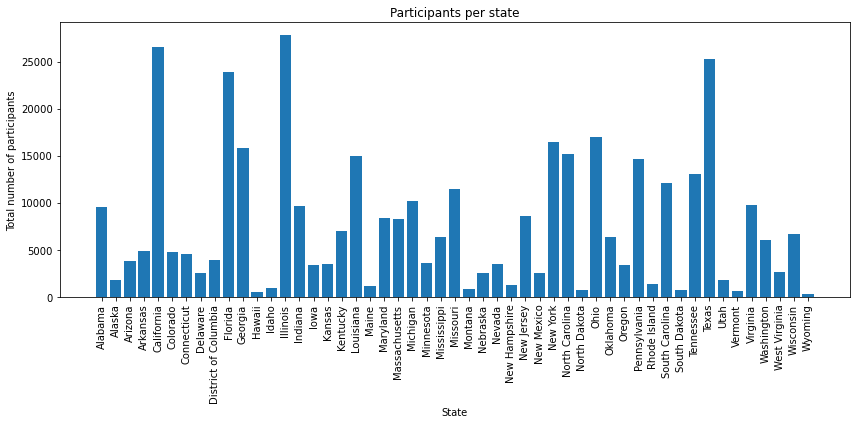

In [15]:
# group by state and compute number pf partecipants (per state)
participants_per_state = df_incidents.groupby('state')['n_participants'].sum().reset_index()

# Histogram
plt.figure(figsize=(12, 6))
plt.bar(participants_per_state['state'], participants_per_state['n_participants'])
plt.xlabel('State')
plt.ylabel('Total number of participants')
plt.title('Participants per state')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



# 3. Data Cleaning [#WIP]()
- Remove Duplicates
- select attributes (to identify the relevant __after looking to correlation matrix__)
- reduce the data dimension (refer to number of attributes, allows categorization of other attributes, __(todo in preparation after cleaning)__
dropping the useless) 
    - look at correlation matrix
    - feature creation by __filter methods, wrapper, embedded methods__. It may regard the creation of *systematic indicators*, so are domain-specific.
- select records --> sampling (random sampling)
    - check what are the composition (e.g. 80% adult, 10% teen, 10% kids) __(todo in preparation after cleaning)__
- treat missing values
    - mean, median, mode to reconstruct
    - classification/regression (?)
- discretization
    - supervised discretization based on entropy (_explain why we do not use discretization)
- normalization (?)
- treat outliers (_in data cleaning_)
- Remove NaNs
    - Some records with NaNs can be reconstructed: reconstruct the null value of `partecipant_age1` starting from the value of `participant_age_group1` that can assume 3 string value "Adult 18+", "Teen 12-17","Child 0-11". (Beforehand we already dropped the NaN records for all attributes except `partecipant_age1`). To reconstruct the exact value, take the `partecipant_age_group1`  and as a value take the mode of all the records in the same group.
- PCA

For the data cleaning phase, we set a threshold of 50% of NA values for each column and remove the redundand records, if any:

## Cleaning pipeline

1. Remove Nans and duplicates
2. Adjust the right numeric type 
3. Outliers detection and removal.

--- 

### Remove Nans and duplicates

In [16]:
# Remove NaNs

df_incidents.isna().sum()

#   Let's get the % of nans with respect to the total number of records, if is > 50% we drop the column

for col in df_incidents.columns:
    pct_missing = np.mean(df_incidents[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

    # drop if more than 50% of the data is missing
    if pct_missing > 0.5:
        df_incidents.drop(col, axis=1, inplace=True)

# Drop duplicates
df_incidents_nodup = df_incidents.drop_duplicates()

date - 0%
state - 0%
city_or_county - 0%
latitude - 3%
longitude - 3%
congressional_district - 0%
state_house_district - 0%
state_senate_district - 0%
participant_age1 - 39%
participant_age_group1 - 18%
participant_gender1 - 15%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 15%
n_females - 15%
n_killed - 0%
n_injured - 0%
n_arrested - 12%
n_unharmed - 12%
n_participants - 0%
notes - 34%
incident_characteristics1 - 0%
incident_characteristics2 - 41%
year - 0%


As shown, no column have more than 50% of null values so among the columns we have selectd, none of them is actually dropped. It's important to highlight that the attribute with the most value missing is `partecipant_age1` so we will see later if this value can be reconstructed/substitute by exploiting other attributes about age of partecipants. For the moment, let's evaluate distribution and standard deviation:

Let's drop the records with NA value, excluding `partecipant_age1`:

In [17]:
columns_to_exclude = ['participant_age1']

# Create a new DataFrame with NaNs removed for all columns except 'participant_age1'
df_incidents_nona = df_incidents_nodup.dropna(subset=[col for col in df_incidents_nodup.columns if col not in columns_to_exclude])

## Reconstructing missing values in `partecipant_age1`

We can reconstruct the missing values of `partecipant_age1` by exploiting the `participant_age_group1` attribute. We can assume that the age of the partecipants in the same group is the same, so we can take the mode of the age of the partecipants in the same group and substitute the missing value with the mode.

In [18]:
# Create a copy of the DataFrame to avoid modifying the original
df_incidents_copy = df_incidents_nona.copy()

# Create a dictionary to store the mode values for each 'participant_age_group1'
mode_dict = df_incidents_copy.groupby('participant_age_group1')['participant_age1'].apply(lambda x: x.mode().values[0]).to_dict()

# Define a function to fill missing values in 'participant_age1' based on 'participant_age_group1'
def fill_age_with_mode(row):
    if pd.isna(row['participant_age1']):
        return mode_dict.get(row['participant_age_group1'], row['participant_age1'])
    return row['participant_age1']

# Apply the function to create a new column 'filled_age1' with updated values
df_incidents_copy['participant_age1_recon'] = df_incidents_copy.apply(fill_age_with_mode, axis=1)

# substitute participant_age1 with participant_age1_recon
df_incidents_copy['participant_age1'] = df_incidents_copy['participant_age1_recon']
# drop participant_age1
df_incidents_copy.drop(['participant_age1_recon'], axis=1, inplace=True)


In [19]:
#   Let's get the % of nans with respect to the total number of records after cleaning

for col in df_incidents_copy.columns:
    pct_missing = np.mean(df_incidents_copy[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
state - 0%
city_or_county - 0%
latitude - 0%
longitude - 0%
congressional_district - 0%
state_house_district - 0%
state_senate_district - 0%
participant_age1 - 0%
participant_age_group1 - 0%
participant_gender1 - 0%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 0%
n_females - 0%
n_killed - 0%
n_injured - 0%
n_arrested - 0%
n_unharmed - 0%
n_participants - 0%
notes - 0%
incident_characteristics1 - 0%
incident_characteristics2 - 0%
year - 0%


### Adjust the right numeric and string type

In [20]:
for col in df_incidents_copy.columns:
    print(col, df_incidents_copy.dtypes[col])

date object
state object
city_or_county object
latitude float64
longitude float64
congressional_district int64
state_house_district int64
state_senate_district int64
participant_age1 float64
participant_age_group1 object
participant_gender1 object
min_age_participants int64
avg_age_participants int64
max_age_participants int64
n_participants_child int64
n_participants_teen int64
n_participants_adult int64
n_males float64
n_females float64
n_killed int64
n_injured int64
n_arrested float64
n_unharmed float64
n_participants float64
notes object
incident_characteristics1 object
incident_characteristics2 object
year int32


As we can see all numerical values needs to be converted to `int64` type, only latitude and longitude are float type.
Also date and other attributes are still `object` type so we need to convert them to `datetime64` and string type respectively.

In [21]:
# Convert 'date' to datetime, state and city_or_country must be string
df_incidents_copy['date'] = pd.to_datetime(df_incidents_copy['date'])

# change type of state and city_or_county to string
# todo

# Convert all other numerical columns to int but not latitude and longitude
for col in df_incidents_copy.columns:
    if col not in ['latitude', 'longitude']:
        # if type is float
        if df_incidents_copy.dtypes[col] == 'float64':
            df_incidents_copy[col] = df_incidents_copy[col].astype(int)


## Outlier detection and wrong data removal

Here we will remove wrong values and some outliers from our data to make it statistically useful for our further analysis. We will use the following methods:

- **Z-score**: to remove outliers from numerical attributes (to be decided)
- **IQR**: to remove outliers from numerical attributes (to be decided)
- **Domain knowledge**: to remove wrong values from numerical attributes 

### Exploiting domain knowledge for numerical ranges

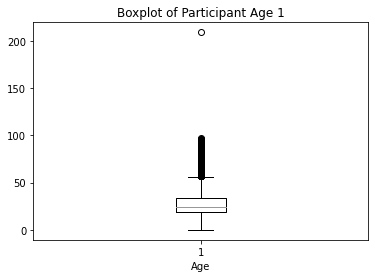

In [22]:
filtered_data = df_incidents_copy['participant_age1']

# Create a boxplot to visualize the distribution
plt.boxplot(filtered_data, vert=True)  # vert=False makes it horizontal
plt.xlabel('Age')
plt.title('Boxplot of Participant Age 1')
plt.show()

# Here we can see that there are some outliers, let's remove them by restraining the age to be between 0 and 100
df_incidents_copy = df_incidents_copy[(df_incidents_copy['participant_age1'] >= 0) & (df_incidents_copy['participant_age1'] <= 100)]

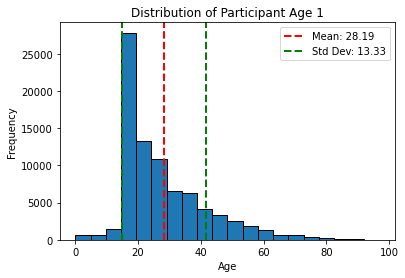

In [23]:
filtered_data = df_incidents_copy['participant_age1']

# Calculate the mean and standard deviation
mean_age = np.mean(filtered_data)
std_dev_age = np.std(filtered_data)

# Create a histogram to visualize the distribution
plt.hist(filtered_data, bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Participant Age 1')

# Add mean and standard deviation to the plot
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='green', linestyle='dashed', linewidth=2)

plt.legend()  # Add a legend to the plot
plt.show()

In [24]:

# removing all values of min_age_participants, max and average greater than 100 or less than 0
df_incidents_copy = df_incidents_copy[(df_incidents_copy['min_age_participants'] > 0) & (df_incidents_copy['min_age_participants'] <= 100)]
df_incidents_copy = df_incidents_copy[(df_incidents_copy['max_age_participants'] > 0) & (df_incidents_copy['max_age_participants'] <= 100)]
df_incidents_copy = df_incidents_copy[(df_incidents_copy['avg_age_participants'] > 0) & (df_incidents_copy['avg_age_participants'] <= 100)]

# Interestingly when you remove some wrong values or outliers you cant get different
# plot of other variables eg: this boxplot show clearly that age is 1e11, but if you remove some outlier then you get anomalous values around 300.


## Mass Shooting #toreview

As we can see sometimes the number of people killed or injured it's not an incident it's a mass shooting

Let's remove this by taking into account this definition, given by FBI:

```
    The Federal Bureau of Investigation (FBI) defines a mass shooting as an incident in which four or more people, not including the shooter, are killed. This definition is often used in the United States.
```

In [25]:

#visualize datapoint with more than 20 killed
df_incidents_copy[df_incidents_copy['n_killed'] > 20]

# summing n_males and females killed over a total participants score
df_incidents_copy['n_participants'].sum()/(df_incidents_copy['n_females'].sum()+df_incidents_copy['n_males'].sum())

1.0510342285160164

Removing also when `n_participants` is >= 5.
This will change the correlation matrix, try to remove this and see what happens

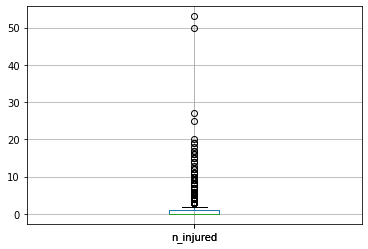

In [26]:
# Let's visualize outliers with a boxplot


df_incidents_copy.boxplot(column='n_killed')
df_incidents_copy.boxplot(column='n_injured')

# Remove outliers if n_killed or n_injured > 4
df_incidents_copy = df_incidents_copy[(df_incidents_copy['n_killed'] < 4) & (df_incidents_copy['n_injured'] < 4)]

# We have to remove when number of participants is more than 5 also
df_incidents_copy = df_incidents_copy[df_incidents_copy['n_participants'] < 5]


# 4. Outliers removal

Here we plot all the variables boxplot and then decide what outliers remove

<AxesSubplot:>

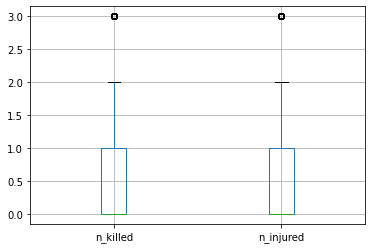

In [27]:
df_incidents_copy.boxplot(column=['n_killed', 'n_injured'])

### Remaining outliers check on the dataset

We will plot all the boxplot relative to the numerical features and check if there are some outliers

' for column in numerical_columns:\n    plt.figure()\n    plt.boxplot(df_incidents_copy[column])\n    plt.title(column)\n    plt.show() '

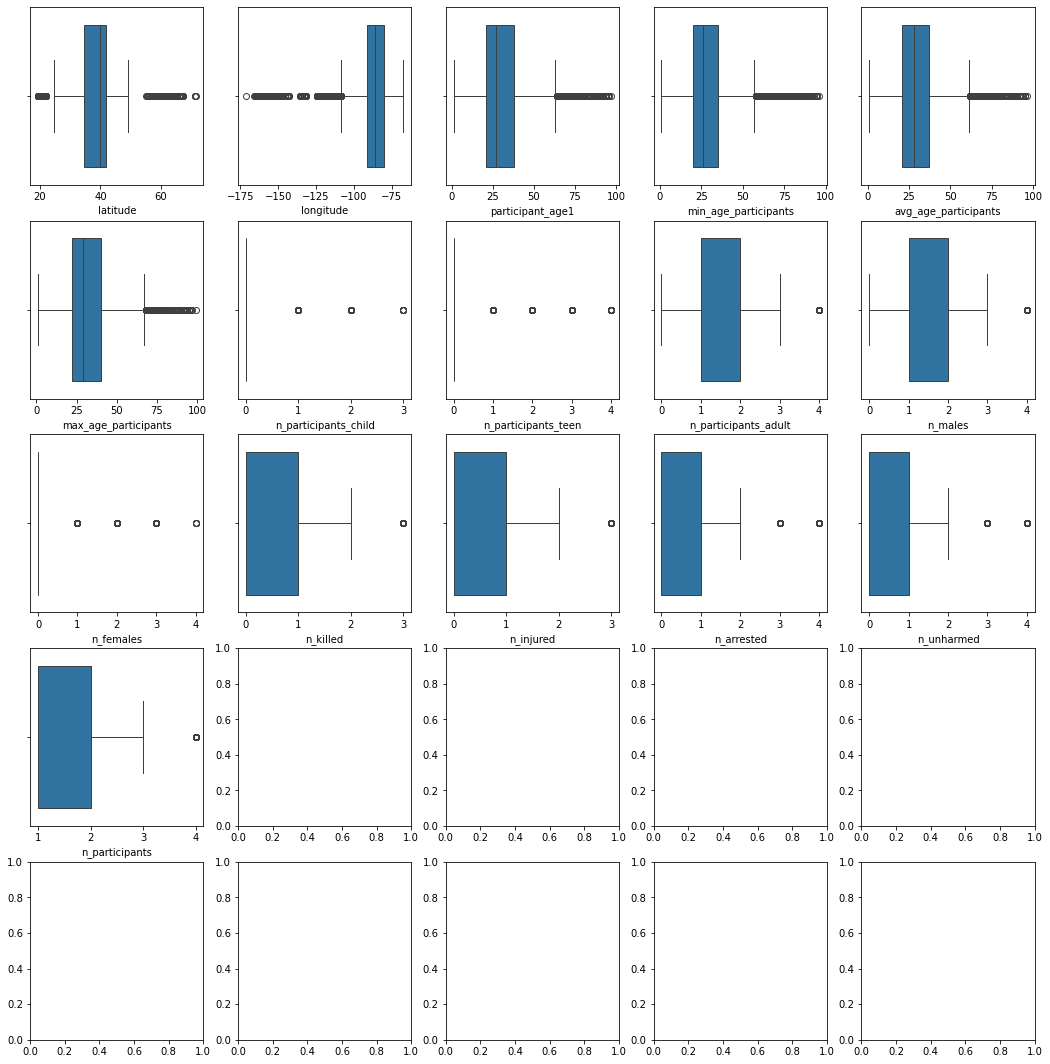

In [28]:
# Plot different subplots of boxplot for each numerical column
import matplotlib.pyplot as plt

# get the numerical columns of the data frame, without taking state senate, congressional district, state house

numerical_columns = df_incidents_copy.select_dtypes(include=['float64', 'int64']).columns.drop(['state_house_district', 'state_senate_district', 'congressional_district'])

# gather all in a single plot
boxplot_ax, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 19))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_incidents_copy[column], ax=axes[i//5, i%5])
    
# create a boxplot for each numerical column
""" for column in numerical_columns:
    plt.figure()
    plt.boxplot(df_incidents_copy[column])
    plt.title(column)
    plt.show() """

# todo
Analyse the box-plot above respect to the outlier, distribution, standard deviation

### Some insights from outliers plot

How about the min, max ages and average? Why so hig? Let's check the data


<AxesSubplot:>

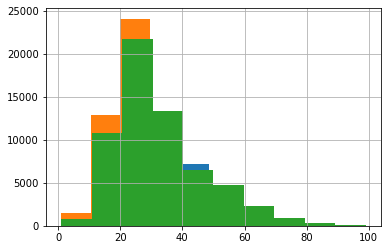

In [29]:
# Let's get hist of age min, max and avg

df_incidents_copy['avg_age_participants'].hist()
df_incidents_copy['min_age_participants'].hist()
df_incidents_copy['max_age_participants'].hist()



## Visualize Distributions #todo maybe remove this in favour of the all visualization later unless intresting thing is discovered

From the first we can see that plotting distirbution of n_killed against the number of incidents we can see that in the majority of the incidents people do not die. 

We have a distribution skewed to the left so the asimmetry index must be positive.

##Numero totale di morti per ogni stato##

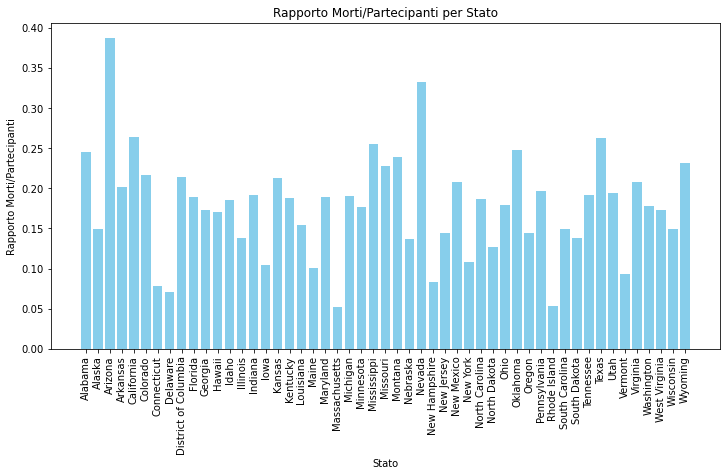

In [30]:
#ratio killed/participants

#gravità media degli incidenti in termini di vittime per partecipante.
# Calcola il numero totale di morti per ogni stato
# Calcola il numero totale di morti per ogni stato
deaths_by_state = df_incidents_copy.groupby('state')['n_killed'].sum()

#numero totale di partecipanti per stato
participants_by_state = df_incidents_copy.groupby('state')['n_participants'].sum()

#rapporto Morti/Partecipanti per stato
mortality_ratio_by_state = deaths_by_state / participants_by_state

#creo un nuovo DataFrame per mostrare i risultati
mortality_ratio_df = pd.DataFrame({
    'Stato': mortality_ratio_by_state.index,
    'Rapporto Morti/Partecipanti': mortality_ratio_by_state.values
})
# stampo l'istogramma
plt.figure(figsize=(12, 6))
plt.bar(mortality_ratio_df['Stato'], mortality_ratio_df['Rapporto Morti/Partecipanti'], color='skyblue')
plt.xlabel('Stato')
plt.ylabel('Rapporto Morti/Partecipanti')
plt.title('Rapporto Morti/Partecipanti per Stato')
plt.xticks(rotation=90)  
plt.show()


# 5. Pairwise correlation analysis
Use the correlation coefficients to understand correlation between a set of attributes

## Consideration about correlation

- Spearman vs Pearson : So we usually want to use *Pearson correlation* if we have a sample data large enough so we can leverage the CLT and assume normally distributed data, on the other hand, we can use Spearman if we have a small sample size (small sample implies high variability in data) so in this case we can't assume normality and we can use Spearman correlation to measure the strength and direction of monotonic association between two variables.

What will we use for our correlation analysis of this dataset? 

Well since we have a big sample size, we can use Pearson correlation, but we have to check if the data are normally distributed, so we will use the Shapiro-Wilk test to check the normality of the data.

Of course we do bootstrapping...

In [31]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test for all numerical columns
# how muych sample we need? 
# We do Bootstrapping with different samples size like 30

def bootstrap_normality_test(data, sample_size, n_iterations):
    
    # create an array of samples
    samples = np.empty((n_iterations, sample_size))
    
    # create an array of means
    means = np.empty(n_iterations)
    
    # create an array of p-values
    p_values = np.empty(n_iterations)
    
    # for each iteration
    for i in range(n_iterations):
        
        # take a random sample of size sample_size from data
        samples[i] = np.random.choice(data, sample_size)
        
        # compute the mean of the sample
        means[i] = np.mean(samples[i])
        
        # compute the p-value of the Shapiro-Wilk test
        stat, p = shapiro(samples[i])
        
        # store the p-value
        p_values[i] = p
        
    # return the array of means and p-values
    return means, p_values

""" for column in numerical_columns:
    stat, p = shapiro(df_incidents_copy[column][0:30])
    # Print column name and stats
    print(column,':\tStatistics=%.3f, p=%.9f' % (stat, p))
    # Exp
    
    # take only columns with normal distribution
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian') """
        
# Let's try bootstrapping
# take a random sample of size 30 from data do it for each column
gaussianity_detect_dict = {}

for column in numerical_columns:
    means, p_values = bootstrap_normality_test(df_incidents_copy[column], 40, 30)
    # Print column name and stats
    print(column,':\tStatistics=%.3f, p=%.9f' % (means.mean(), p_values.mean()))
    # Exp
    
    # take only columns with normal distribution
    if p_values.mean() > 0.05:
        print('Probably Gaussian')
        # fill dict
        gaussianity_detect_dict[column] = True
    else:
        print('Probably not Gaussian')
        # fill dict
        gaussianity_detect_dict[column] = False

latitude :	Statistics=38.502, p=0.045782887
Probably not Gaussian
longitude :	Statistics=-89.533, p=0.004414387
Probably not Gaussian
participant_age1 :	Statistics=31.088, p=0.032450384
Probably not Gaussian
min_age_participants :	Statistics=29.079, p=0.051929417
Probably Gaussian
avg_age_participants :	Statistics=30.980, p=0.043992096
Probably not Gaussian
max_age_participants :	Statistics=31.718, p=0.086978538
Probably Gaussian
n_participants_child :	Statistics=0.040, p=0.166666667
Probably Gaussian
n_participants_teen :	Statistics=0.143, p=0.000000000
Probably not Gaussian
n_participants_adult :	Statistics=1.553, p=0.000206047
Probably not Gaussian
n_males :	Statistics=1.486, p=0.000036155
Probably not Gaussian
n_females :	Statistics=0.252, p=0.000000006
Probably not Gaussian
n_killed :	Statistics=0.323, p=0.000000023
Probably not Gaussian
n_injured :	Statistics=0.443, p=0.000000288
Probably not Gaussian
n_arrested :	Statistics=0.662, p=0.000000870
Probably not Gaussian
n_unharmed :

/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1758: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.



## Visualizing all the distributions 

Now let's visualize all the distribution in a subplot to see how they are distributed

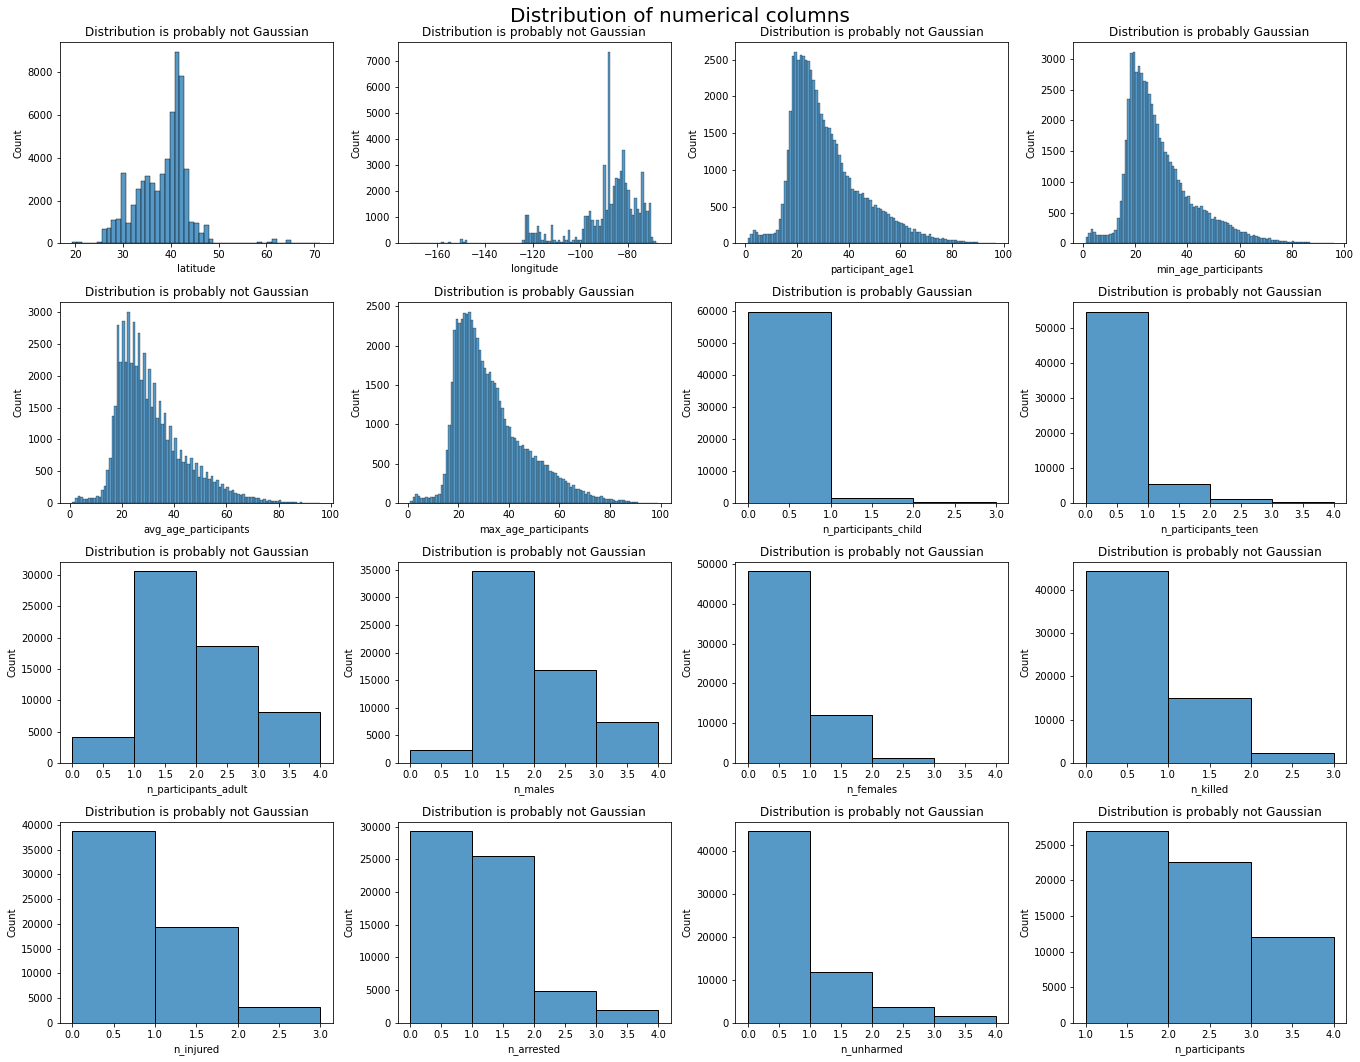

In [32]:
import seaborn as sns
# Subplot of each numerical column distribution

# get the numerical columns of the data frame
numerical_columns = df_incidents_copy.select_dtypes(include=['float64', 'int64']).columns

# create a boxplot for each numerical column
subplot_rows = 4
subplot_cols = 4

fig, axes = plt.subplots(nrows=subplot_rows, ncols=subplot_cols, figsize=(19, 15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of numerical columns', size=20)


# reove columns that are numerical but doens't matter the distribution like state_house_district, state_senate_district.
numerical_columns_distributions = numerical_columns.drop(['state_house_district', 'state_senate_district', 'congressional_district'])

for i, column in enumerate(numerical_columns_distributions):
    # understanding how many bins a column should have
    # drop column named low_participants and high_participants
    
        bins_required = df_incidents_copy[column].max() - df_incidents_copy[column].min()
        bins_required = int(bins_required)
        
        # add if gaussian is detected or not near the name of the column
        """ if gaussianity_detect_dict[column]:
            column = column + ' (Gaussian)'
        else:
            column = column + ' (Not Gaussian)'
         """
         
        # Add a title on each subplot
         
        row = i // subplot_cols
        col = i % subplot_cols
        axes[row, col] = sns.histplot(x=df_incidents_copy[column], ax=axes[row, col], bins=bins_required)
        
        axes[row, col].set_title("Distribution is probably Gaussian" if gaussianity_detect_dict[column] else "Distribution is probably not Gaussian")
        
        # add space between subplots
        plt.tight_layout()
        
        #axes[row, col].hist(df_incidents_copy[column])
        #axes[row, col].set_title(column)


<AxesSubplot:>

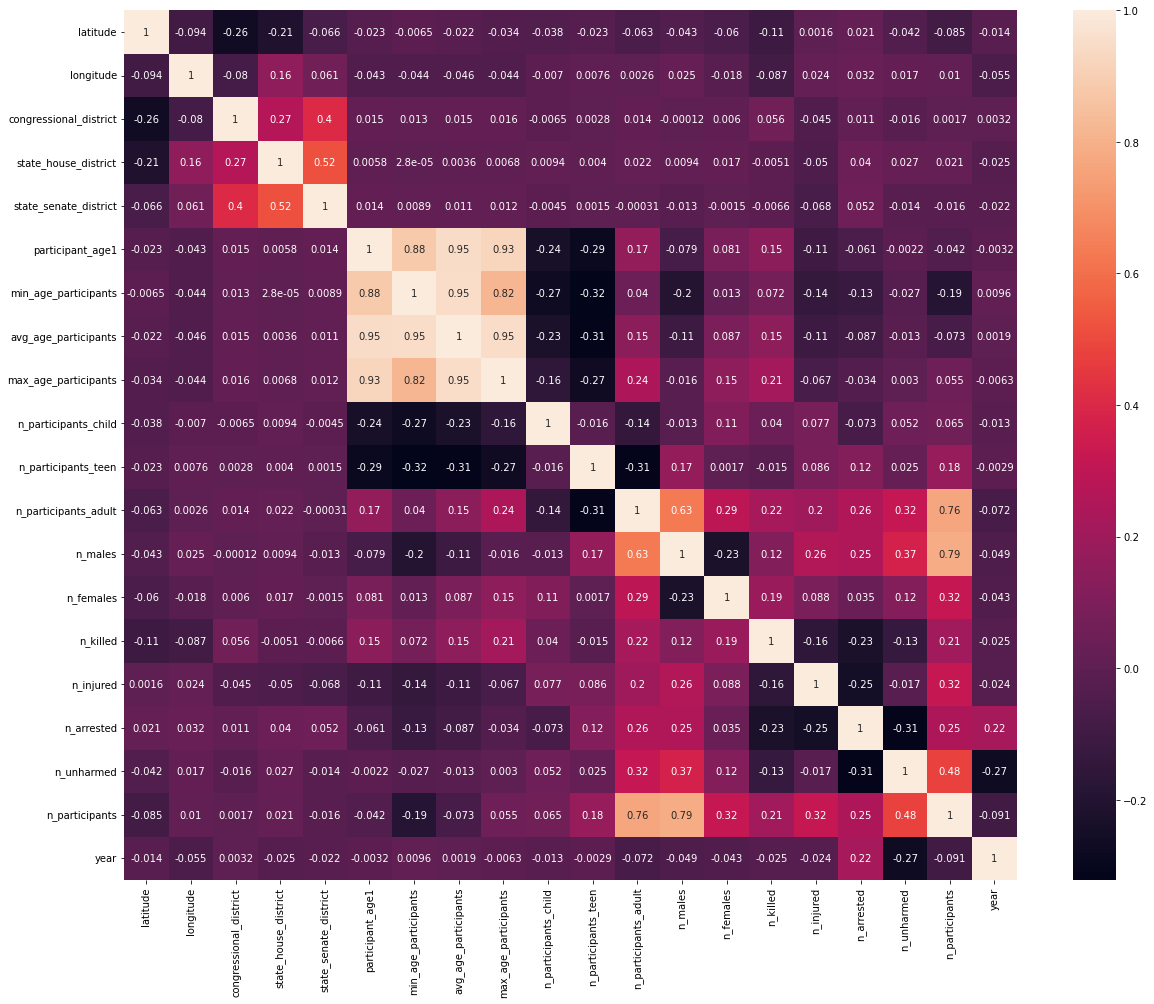

In [33]:
# vector containig all numerical features
numerical_features = df_incidents_copy.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 16))  # Adjust the values (width, height) as needed
correlation_matrix_all = df_incidents_copy[numerical_features].corr()
sns.heatmap(correlation_matrix_all, annot=True)

# As for the correlation n_males & n_participants we can do statistical significance test, in our case the 
# null hypotesis is that the two variables are independent, we can reject the null hypotesis if the p-value is < 0.05

# Contigency table is used for categorical variable, so we can do a thing like this, take intervals 0-1 and 2-3 of participants
# and make this a categorical variable, then we can do a chi-square test

# adding low_participants column and high_participants column
# need to understand if this make sense or it's redundant.

# Maybe remove this because it's useless or part of data preparation
#df_incidents_copy['low_participants'] = df_incidents_copy['n_participants'].apply(lambda x: 1 if x < 2 else 0)
#df_incidents_copy['high_participants'] = df_incidents_copy['n_participants'].apply(lambda x: 1 if x > 1 else 0)

# And now a little visualization of the chi2 test
# Visualize the result of the test
# print max vaues of n_participants


# Consideration on the correlation matrix

- Drop max and min age

We can see that some of the correlation are very high like *max_age_participants*, *min_age_participants* and the *mean_age_participants*.
We could drop max and min since it's a redundancy and the mean represent the average of the two.

- Maybe we can drop *n_participant_adult* with *n_participant* because they are highly correlated 0.76 and *n_males* with *n_participant* 


#### Correlation matrix of all our features [#WIP]() ##TODO CHECK THIS

#### Intresting correlations that can be inferred
-  `n_participants` and `n_males` is higly correlated: 0.83 (This will lower if we filter the `n_participants` > 5, still high tough)
-  `n_participants` and `n_females` is not: 0.36
- After converting some feature from object to int-float intresting correlation arises!

## Next section maybe we need to remove it, it's kinda useless

# Incident for males and females ##TODO this is more data preparation...

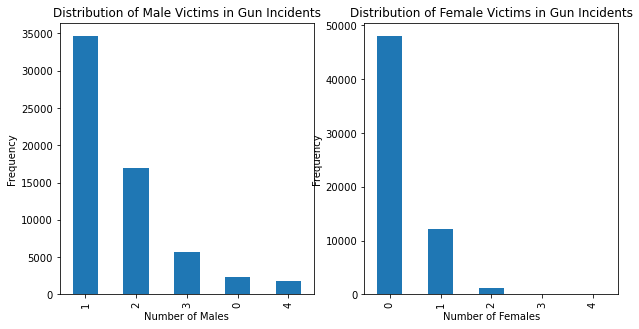

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the male incidents in the first subplot
df_incidents_copy['n_males'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Number of Males')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Male Victims in Gun Incidents')

# Plot the female incidents in the second subplot
df_incidents_copy['n_females'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Number of Females')
# Numer of incidents with particular numb of female and male
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Female Victims in Gun Incidents')

# Display the plot
plt.show()

# Map visualization

/tmp/ipykernel_473912/1580533046.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


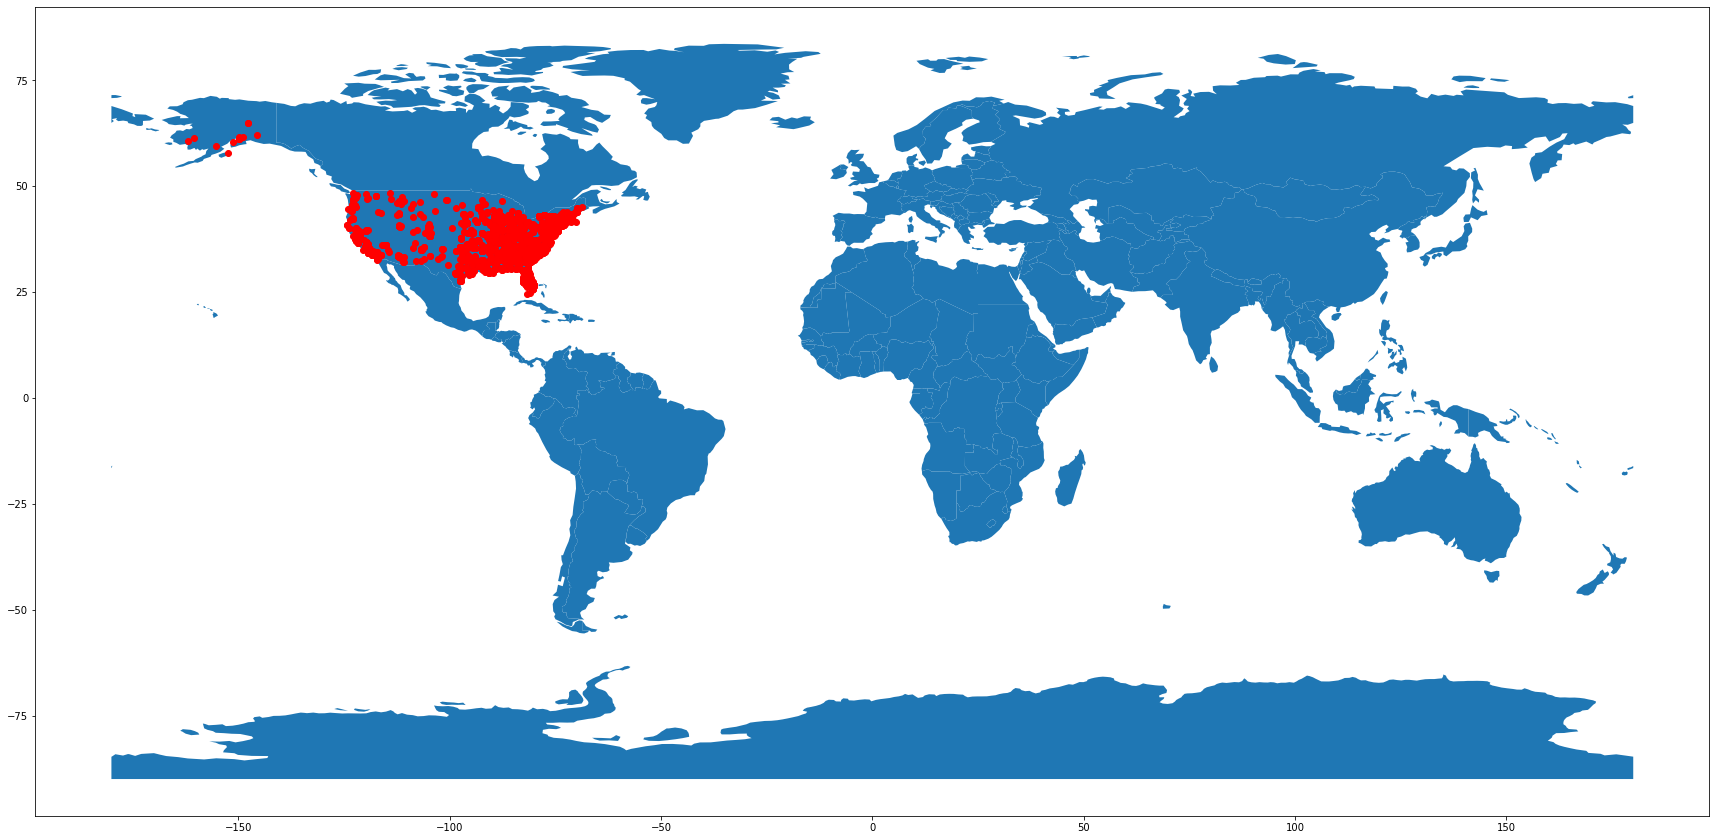

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

#usa_map = gpd.read_file('../map_data/usa-states-census-2014.shp')

# use entire world map
usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# show map



usa_map.plot(figsize=(30,40))

# Draw red point for each latitude and longitude on df_incidents for 50 sampled incidents
sample_incidents = df_incidents_nodup.sample(len(df_incidents_nodup)//100)

for index, row in sample_incidents.iterrows():
    plt.plot(row['longitude'], row['latitude'], 'ro')
    

usa_map.head()


## Visualize out of map (USA) incidents: BING CHILING

From

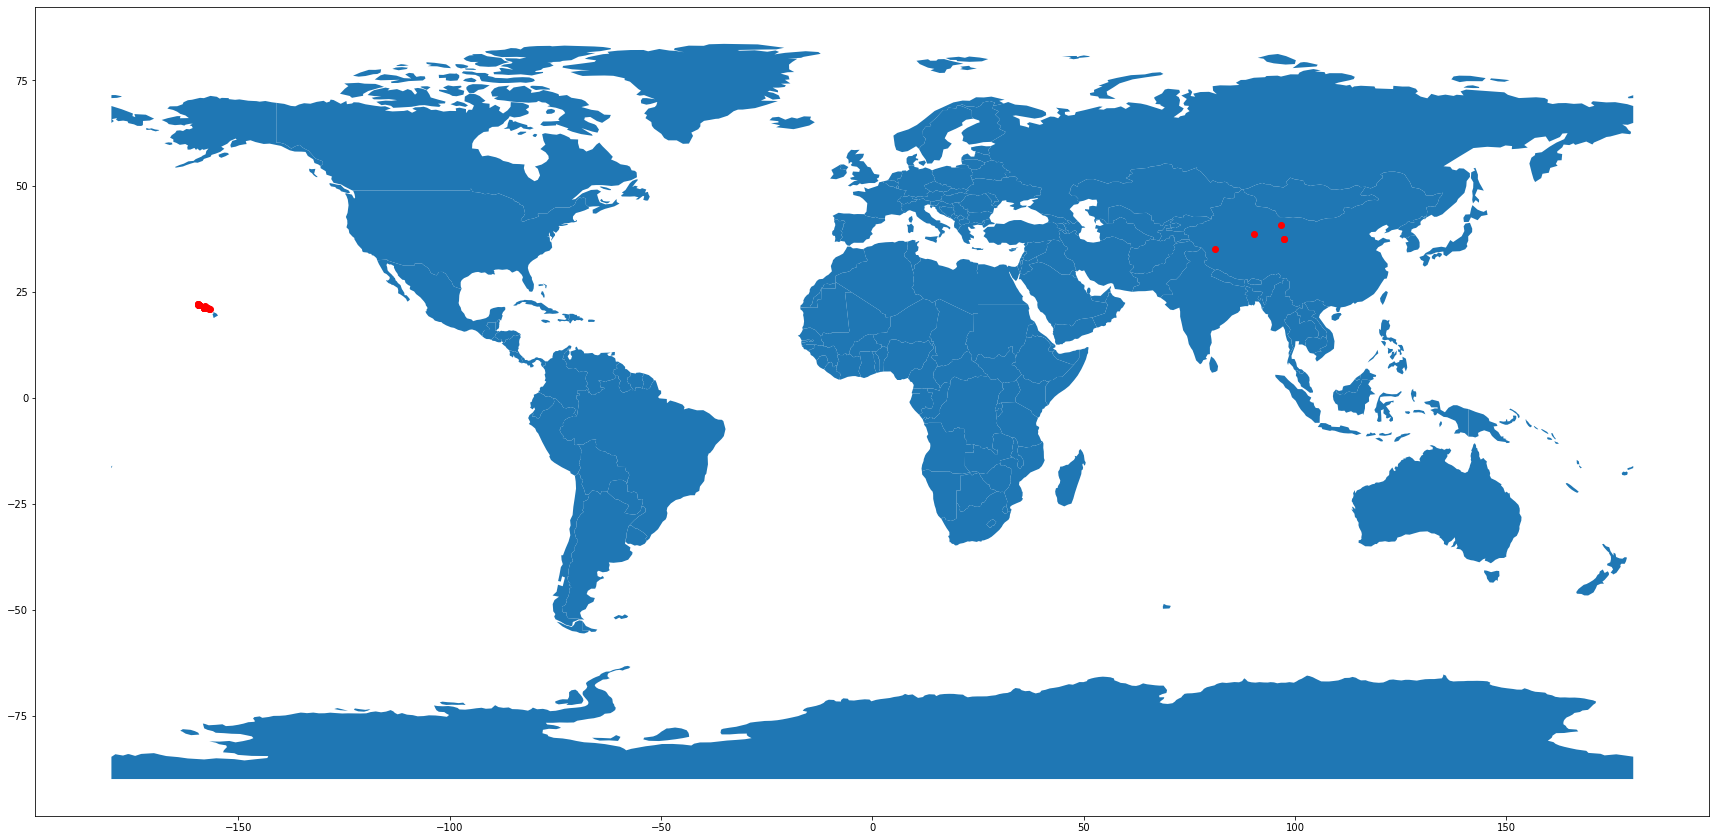

In [36]:
# More generally

GENERAL = True


def is_outside_usa(latitude, longitude):
    # Bounding box coordinates for the contiguous United States
    min_latitude, max_latitude = 24, 49
    min_longitude, max_longitude = -125, -66

    # Check if the point is outside the bounding box
    return not ((min_latitude <= latitude <= max_latitude) and (min_longitude <= longitude <= max_longitude))

def is_inside_bbox(latitude, longitude, bbox):
    min_lat, max_lat, min_lon, max_lon = bbox
    return min_lat <= latitude <= max_lat and min_lon <= longitude <= max_lon

def is_inside_usa(latitude, longitude):
    usa_bbox = (24.396308, 49.384358, -125.000000, -66.934570)
    alaska_bbox = (51.208344, 71.538800, -179.148909, -129.993926)
    hawaii_bbox = (18.865459, 20.965738, -156.682556, -154.807149)

    return (
        is_inside_bbox(latitude, longitude, usa_bbox) or
        is_inside_bbox(latitude, longitude, alaska_bbox) or
        is_inside_bbox(latitude, longitude, hawaii_bbox)
    )


out_usa = []
out_usa_good = []

for latitude, longitude in zip(df_incidents_nodup['latitude'], df_incidents_nodup['longitude']):
    if is_outside_usa(latitude, longitude):
        out_usa.append((latitude, longitude))
    if not is_inside_usa(latitude, longitude):
        out_usa_good.append((latitude, longitude))
        
usa_map.plot(figsize=(30,40))

if GENERAL:
    for latitude, longitude in out_usa_good:
        plt.plot(longitude, latitude, 'ro')
else:
    for latitude, longitude in out_usa:
        plt.plot(longitude, latitude, 'ro')

# Now looking at China

We need to discard these data

37.6499 97.4331
37.6499 97.4331
40.8509 96.7591
35.2137 80.9491
38.7487 90.37


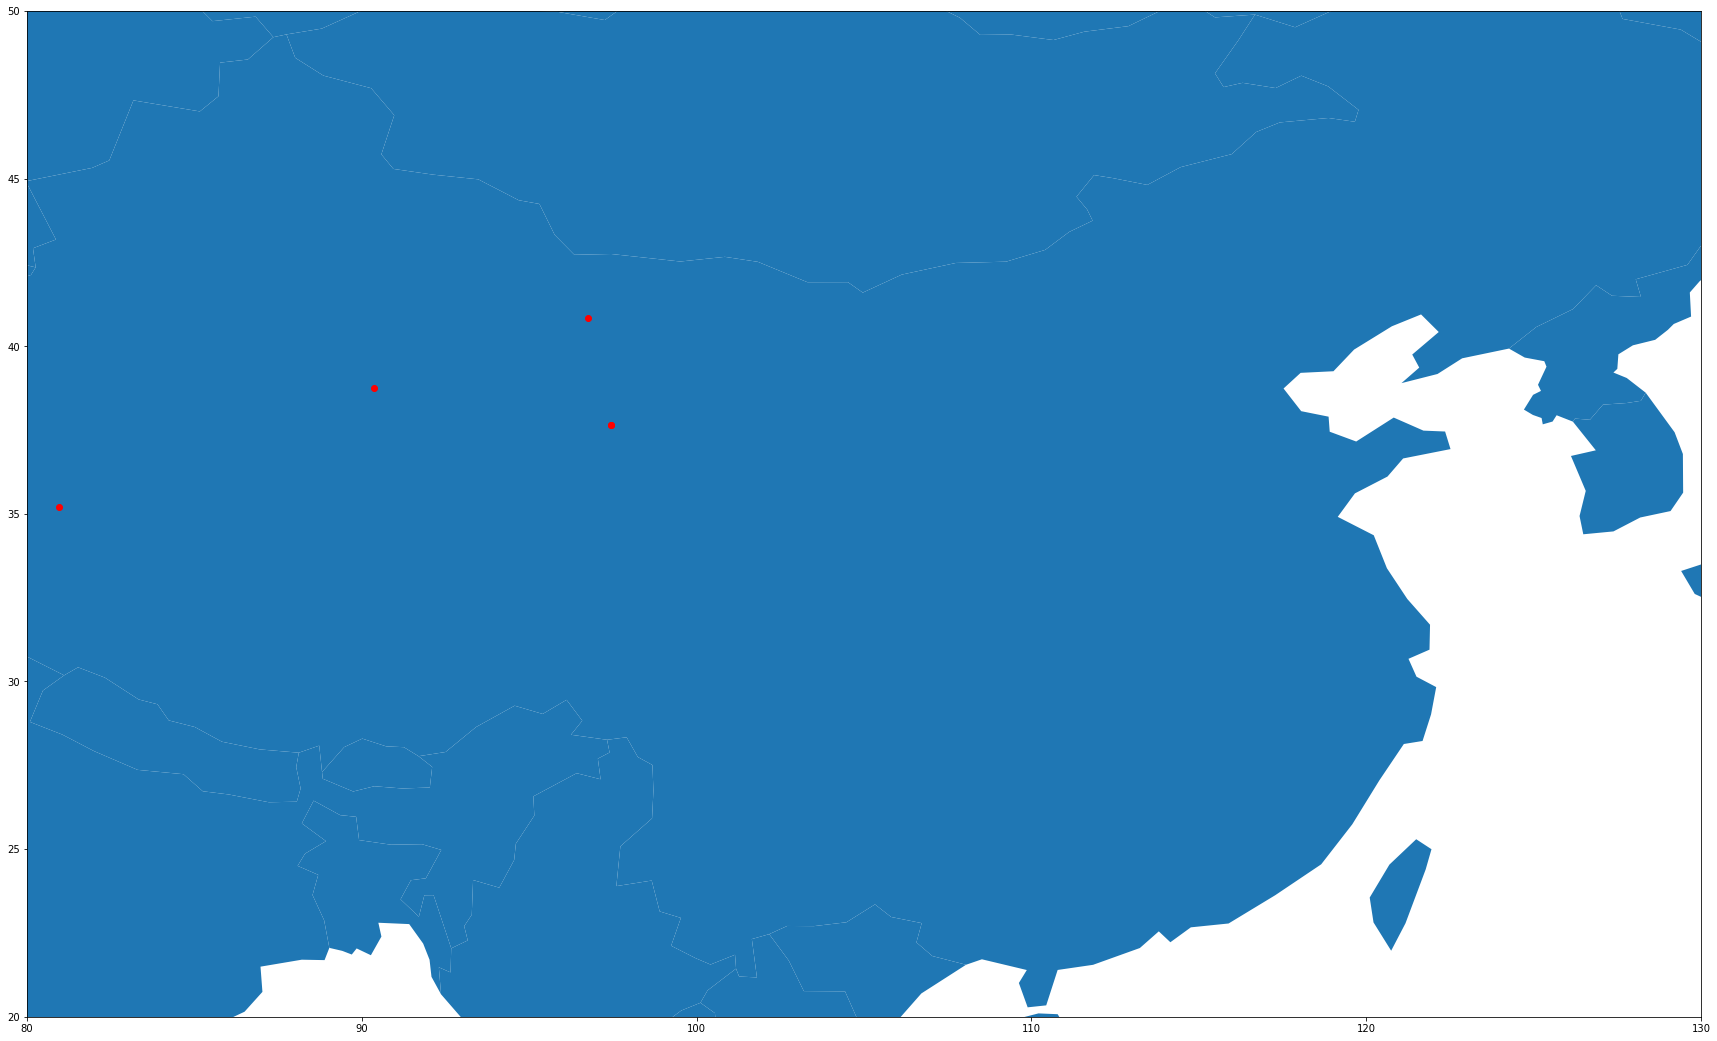

In [37]:
def is_inside_china(latitude, longitude):
    # Bounding box coordinates for China
    min_latitude, max_latitude = 20, 50
    min_longitude, max_longitude = 80, 130

    # Check if the point is inside the bounding box
    return (min_latitude <= latitude <= max_latitude) and (min_longitude <= longitude <= max_longitude)

bing_chiling = []
# Filter all incidents that are inside China
for latitude, longitude in zip(df_incidents_nodup['latitude'], df_incidents_nodup['longitude']):
    if is_inside_china(latitude, longitude):
        print(latitude, longitude)
        bing_chiling.append((latitude, longitude))
        
# Plot the incidents inside China
usa_map.plot(figsize=(30,40))
# zoom on china
plt.xlim(80, 130)
plt.ylim(20, 50)

for latitude, longitude in bing_chiling:
    plt.plot(longitude, latitude, 'ro')



In [38]:
# Number of states seems to be ok

print("Number of states: ")
print(len(df_incidents_nodup['state'].unique()))

print("Number of cities or counties: ")
print(len(df_incidents_nodup['city_or_county'].unique()))

df_incidents_nodup['state'].unique()




Number of states: 
51
Number of cities or counties: 
12898


array(['Indiana', 'Pennsylvania', 'Michigan', 'District of Columbia',
       'North Carolina', 'Louisiana', 'Connecticut', 'Virginia',
       'Oklahoma', 'New York', 'Missouri', 'California', 'Texas',
       'Illinois', 'Ohio', 'Washington', 'Florida', 'South Carolina',
       'Georgia', 'Massachusetts', 'Tennessee', 'West Virginia',
       'New Jersey', 'Arkansas', 'Rhode Island', 'Maine', 'Nevada',
       'Colorado', 'New Mexico', 'Maryland', 'Oregon', 'South Dakota',
       'Kentucky', 'Alabama', 'Arizona', 'Minnesota', 'Wisconsin',
       'Mississippi', 'Kansas', 'Iowa', 'Wyoming', 'Nebraska', 'Alaska',
       'Utah', 'Montana', 'Hawaii', 'Delaware', 'Idaho', 'New Hampshire',
       'Vermont', 'North Dakota'], dtype=object)

In [ ]:

# after this finished run this to save into a csv file
usa_map_cloropleth.to_csv('../source/ds/fips-unemp-16.csv', index=False)

50


<AxesSubplot:ylabel='Frequency'>

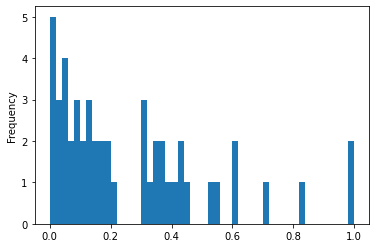

In [39]:
# Trying to plot a colormap or heatmap 

# Using cloropleth map
from plotly import *

# Plotly suggest GeoJSON let's see what we need to do




state_incidents = {}

usa_incidents_map = gpd.read_file('../map_data/usa-states-census-2014.shp')

# Counting the number of incidents per state
for state in sample_incidents['state'].unique():
    state_incidents[state] = len(sample_incidents[sample_incidents['state'] == state])


max_incidents = max(state_incidents.values())
min_incidents = min(state_incidents.values())

for state in state_incidents:
    state_incidents[state] = (state_incidents[state] - min_incidents) / (max_incidents - min_incidents)
    
# Convert in dataframe and divide key and value in two columns state and score
state_incidents_df = pd.DataFrame.from_dict(state_incidents, orient='index')
state_incidents_df.reset_index(inplace=True)
state_incidents_df.columns = ['state', 'score']


# histogram of the scores
# why 46? explore this
print(len(state_incidents_df['state'].unique()))
state_incidents_df['score'].plot(kind='hist', bins=len(state_incidents_df['state'].unique()))


# To get a color map we need to merge the map geometric data dataframe with state column (need to find or build it) with our dataset


# This is from sampled data, be careful! [#WIP]()

{'Washington': 0.18235294117647058,
 'Illinois': 1.0,
 'Arizona': 0.17647058823529413,
 'California': 0.9941176470588236,
 'Pennsylvania': 0.6058823529411764,
 'Florida': 0.8235294117647058,
 'Maryland': 0.4235294117647059,
 'Massachusetts': 0.3,
 'Louisiana': 0.4235294117647059,
 'Kansas': 0.07058823529411765,
 'Texas': 0.7058823529411765,
 'New York': 0.6176470588235294,
 'Indiana': 0.31176470588235294,
 'South Carolina': 0.37058823529411766,
 'Virginia': 0.35294117647058826,
 'Alabama': 0.36470588235294116,
 'Missouri': 0.38235294117647056,
 'Georgia': 0.5588235294117647,
 'Tennessee': 0.4,
 'Maine': 0.041176470588235294,
 'Oregon': 0.12941176470588237,
 'Arkansas': 0.17058823529411765,
 'North Carolina': 0.4470588235294118,
 'New Jersey': 0.3235294117647059,
 'Ohio': 0.5352941176470588,
 'Nebraska': 0.08235294117647059,
 'Wisconsin': 0.3176470588235294,
 'Michigan': 0.35294117647058826,
 'District of Columbia': 0.14705882352941177,
 'Oklahoma': 0.21176470588235294,
 'Minnesota': 0.

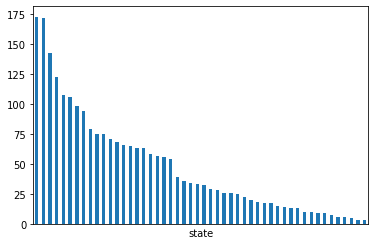

In [43]:
#sample_incidents['city_or_county'].groupby(sample_incidents['state']).value_counts().plot(kind='bar')
sample_incidents['state'].value_counts().plot(kind='bar')
# omit x axis name
plt.xticks([])

state_incidents

In [44]:
#sum arrested, injured, killed and compare to n_participants to a random record
sample_incidents['n_participants'] == sample_incidents['n_arrested'] + sample_incidents['n_injured'] + sample_incidents['n_killed']


#sample_incidents['n_participants'][88251] == sample_incidents['n_arrested'][88251] + sample_incidents['n_injured'][88251] + sample_incidents['n_killed'][88251]

93903     False
233929     True
172129     True
162220     True
218394     True
          ...  
173526     True
157154    False
35520      True
211988    False
168682    False
Length: 2392, dtype: bool

# SAVING DATA CLEANED

In [46]:
file_path = '../source/ds/cleaned_incidents_taskDU.csv'
df_incidents_copy.to_csv(file_path, index=False)

print(f'Data saved to {file_path}')

Data saved to ../source/ds/cleaned_incidents_taskDU.csv
